LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score

In [2]:
import pandas as pd
#  prueba github
# Cargar los archivos en DataFrames
lc = pd.read_csv('../data/raw/lending_club_loan_two.csv')
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [120]:
pd.set_option('display.max_columns', None)
lc.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

loan_amnt: Monto del préstamo solicitado.
term: Plazo del préstamo en meses.
int_rate: Tasa de interés del préstamo.
installment: Pago mensual del préstamo.
grade: Grado asignado al préstamo por LendingClub (A, B, C, etc.).
sub_grade: Subgrado asignado al préstamo por LendingClub (A1, A2, B1, etc.).
emp_title: Título laboral del prestatario.
emp_length: Antigüedad laboral del prestatario en años.
home_ownership: Estado de propiedad de la vivienda del prestatario (RENT, OWN, MORTGAGE, OTHER).
annual_inc: Ingreso anual del prestatario.
verification_status: Estado de verificación del ingreso del prestatario.
issue_d: Fecha en la que se emitió el préstamo.
loan_status: Estado actual del préstamo (Fully Paid, Charged Off, etc.).
purpose: Propósito del préstamo.
title: Título del préstamo proporcionado por el prestatario.
dti: Relación entre las deudas y el ingreso del prestatario.
earliest_cr_line: Fecha en que se abrió la primera línea de crédito del prestatario.
open_acc: Número de líneas de crédito abiertas en el archivo del prestatario.
pub_rec: Número de registros públicos desfavorables.
revol_bal: Saldo total de las cuentas de crédito renovable.
revol_util: Tasa de utilización de las cuentas de crédito renovable.
total_acc: Número total de cuentas de crédito del prestatario.
initial_list_status: Estado inicial de la lista del préstamo (W, F).
application_type: Tipo de aplicación (INDIVIDUAL, JOINT).
mort_acc: Número de cuentas hipotecarias.
pub_rec_bankruptcies: Número de quiebras en los registros públicos.
address: Dirección del prestatario.

In [121]:
lc.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000

In [122]:
lc['issue_d'].dtype

dtype('O')

In [123]:
lc['issue_d'].max()

'Sep-2016'

In [124]:
lc['issue_d'].min()

'Apr-2008'

In [125]:
lc['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [126]:
lc['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

In [127]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [128]:
lc['issue_d'] = pd.to_datetime(lc['issue_d'], format='%b-%Y')

In [129]:
# Crear un diccionario para almacenar el conteo por año
conteo_por_año = {}

# Iterar sobre los años
for año in range(2009, 2016):
    # Filtrar el DataFrame para el año específico
    lc_año = lc[(lc['issue_d'].dt.year == año)]
    
    # Almacenar el conteo en el diccionario
    conteo_por_año[año] = len(lc_año)

# Mostrar el conteo por año
for año, conteo in conteo_por_año.items():
    print(f'Número de elementos para el año {año}: {conteo}')

Número de elementos para el año 2009: 3826
Número de elementos para el año 2010: 9258
Número de elementos para el año 2011: 17435
Número de elementos para el año 2012: 41202
Número de elementos para el año 2013: 97662
Número de elementos para el año 2014: 102860
Número de elementos para el año 2015: 94264


In [130]:
# Crear un diccionario para almacenar el conteo por año y NaN en 'mort_acc'
conteo_por_año = {}
nan_por_año = {}

# Iterar sobre los años
for año in range(2009, 2016):
    # Filtrar el DataFrame para el año específico
    lc_año = lc[(lc['issue_d'].dt.year == año)]
    
    # Almacenar el conteo total en el diccionario
    conteo_por_año[año] = len(lc_año)
    
    # Contar los NaN en 'mort_acc'
    nan_en_mort_acc = lc_año['mort_acc'].isna().sum()
    nan_por_año[año] = nan_en_mort_acc

# Mostrar el conteo y los NaN por año
for año, conteo in conteo_por_año.items():
    nan_count = nan_por_año[año]
    print(f'Número de elementos para el año {año}: {conteo}, NaN en mort_acc: {nan_count}')

Número de elementos para el año 2009: 3826, NaN en mort_acc: 3826
Número de elementos para el año 2010: 9258, NaN en mort_acc: 9258
Número de elementos para el año 2011: 17435, NaN en mort_acc: 17435
Número de elementos para el año 2012: 41202, NaN en mort_acc: 5841
Número de elementos para el año 2013: 97662, NaN en mort_acc: 0
Número de elementos para el año 2014: 102860, NaN en mort_acc: 0
Número de elementos para el año 2015: 94264, NaN en mort_acc: 0


In [131]:
# OJO PARA QUEDARME CON UN AÑO SOLO........ACHICAR MUESTRA Y SEA MAS MANEJABLE
# Me quedo con el 2012, por tener un tamaño medio entre los años iniciales y mantiene casi 
# todas las mort_acc que quiero tener en cuenta


lc['issue_d'] = pd.to_datetime(lc['issue_d'], format='%b-%Y')

# Filtrar el DataFrame para las fechas específicas
lc_2012 = lc[(lc['issue_d'] >= '2012-01-01') & (lc['issue_d'] <= '2012-12-31')]

In [132]:
# lo convierto a csv 

# lc_2012.to_csv('lc_2012.csv', index=False)

In [133]:
lc_2012['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.835202
Charged Off    0.164798
Name: proportion, dtype: float64

In [134]:

# OJO CON ESTO..........................

w_p = lc_2012.loan_status.value_counts()[0] / lc_2012.shape[0]
w_n = lc_2012.loan_status.value_counts()[1] / lc_2012.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.835202174651716
Weight of negative values 0.16479782534828408


In [135]:
lc_2012['loan_status'] = lc_2012.loan_status.map({'Fully Paid':1, 'Charged Off':0})

C:\Users\joaqu\AppData\Local\Temp\ipykernel_12248\3932983957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lc_2012['loan_status'] = lc_2012.loan_status.map({'Fully Paid':1, 'Charged Off':0})


In [136]:
lc_2012.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
7     13000.0   36 months     11.14       426.47     B        B2   
9     26300.0   36 months     16.29       928.40     C        C5   
14    25975.0   36 months      6.62       797.53     A        A2   
75    13200.0   36 months     10.74       430.53     B        B2   
80    19000.0   36 months     12.12       632.17     B        B3   

                        emp_title emp_length home_ownership  annual_inc  \
7                    Office Depot  10+ years           RENT     46000.0   
9              Regado Biosciences    3 years       MORTGAGE    115000.0   
14      Pullman Regional Hospital    9 years       MORTGAGE     65000.0   
75  Brookdale University Hospital     1 year           RENT     45000.0   
80         Broward Sheriff Office    8 years           RENT     48000.0   

   verification_status    issue_d  loan_status             purpose  \
7         Not Verified 2012-09-01            1         credit_card   
9             Verified 2012-04-01            1  debt_consolidation   
14            Verified 2012-10-01            1      small_business   
75     Source Verified 2012-03-01            1  debt_consolidation   
80     Source Verified 2012-07-01            1  debt_consolidation   

                   title    dti earliest_cr_line  open_acc  pub_rec  \
7   No More Credit Cards  26.87         Sep-1994      11.0      0.0   
9     Debt Consolidation  23.69         Dec-1997      13.0      0.0   
14              Business   9.18         May-2001       9.0      0.0   
75  Honost Consolidation  12.80         May-1994       8.0      0.0   
80             Debt Loan  29.76         Jun-1994      12.0      0.0   

    revol_bal  revol_util  total_acc initial_list_status application_type  \
7     13425.0        64.5       15.0                   f       INDIVIDUAL   
9     22171.0        82.4       37.0                   f       INDIVIDUAL   
14     5140.0         7.2       35.0                   f       INDIVIDUAL   
75    10665.0        75.6       10.0                   f       INDIVIDUAL   
80    30071.0        46.5       28.0                   f       INDIVIDUAL   

    mort_acc  pub_rec_bankruptcies  \
7        0.0                   0.0   
9        1.0                   0.0   
14       6.0                   0.0   
75       0.0                   0.0   
80       0.0                   0.0   

                                              address  
7                         USCGC Nunez\r\nFPO AE 30723  
9              3390 Luis Rue\r\nMauricestad, VA 00813  
14  0472 Weber Manors Apt. 660\r\nLake Andrew, NH ...  
75  1741 Jackson Street Suite 615\r\nNew Jenny, MA...  
80  58673 Foster Freeway\r\nPort Meredithville, NY...

In [137]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41202 entries, 7 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             41202 non-null  float64       
 1   term                  41202 non-null  object        
 2   int_rate              41202 non-null  float64       
 3   installment           41202 non-null  float64       
 4   grade                 41202 non-null  object        
 5   sub_grade             41202 non-null  object        
 6   emp_title             38725 non-null  object        
 7   emp_length            39691 non-null  object        
 8   home_ownership        41202 non-null  object        
 9   annual_inc            41202 non-null  float64       
 10  verification_status   41202 non-null  object        
 11  issue_d               41202 non-null  datetime64[ns]
 12  loan_status           41202 non-null  int64         
 13  purpose             

5   sub_grade             41202 non-null  object        
 6   emp_title             38725 non-null  object ...............OJO       
 7   emp_length            39691 non-null  object .................OJO       
 8   home_ownership        41202 non-null  object        
 9   annual_inc            41202 non-null  float64       
 10  verification_status   41202 non-null  object        
 11  issue_d               41202 non-null  datetime64[ns]
 
 12  loan_status           41202 non-null  object        
 13  purpose               41202 non-null  object        
 14  title                 41201 non-null  object  ...................OJO      
 15  dti                   41202 non-null  float64       
 16  earliest_cr_line      41202 non-null  object        
 17  open_acc              41202 non-null  float64       
 18  pub_rec               41202 non-null  float64       
 19  revol_bal             41202 non-null  float64       
 20  revol_util            41169 non-null  float64 ...................OJO      
 21  total_acc             41202 non-null  float64       
 22  initial_list_status   41202 non-null  object        
 23  application_type      41202 non-null  object        
 24  mort_acc              35361 non-null  float64 ..................OJO      
 25  pub_rec_bankruptcies  41202 non-null  float64       
 26  address               41202 non-null  object    

<Axes: >

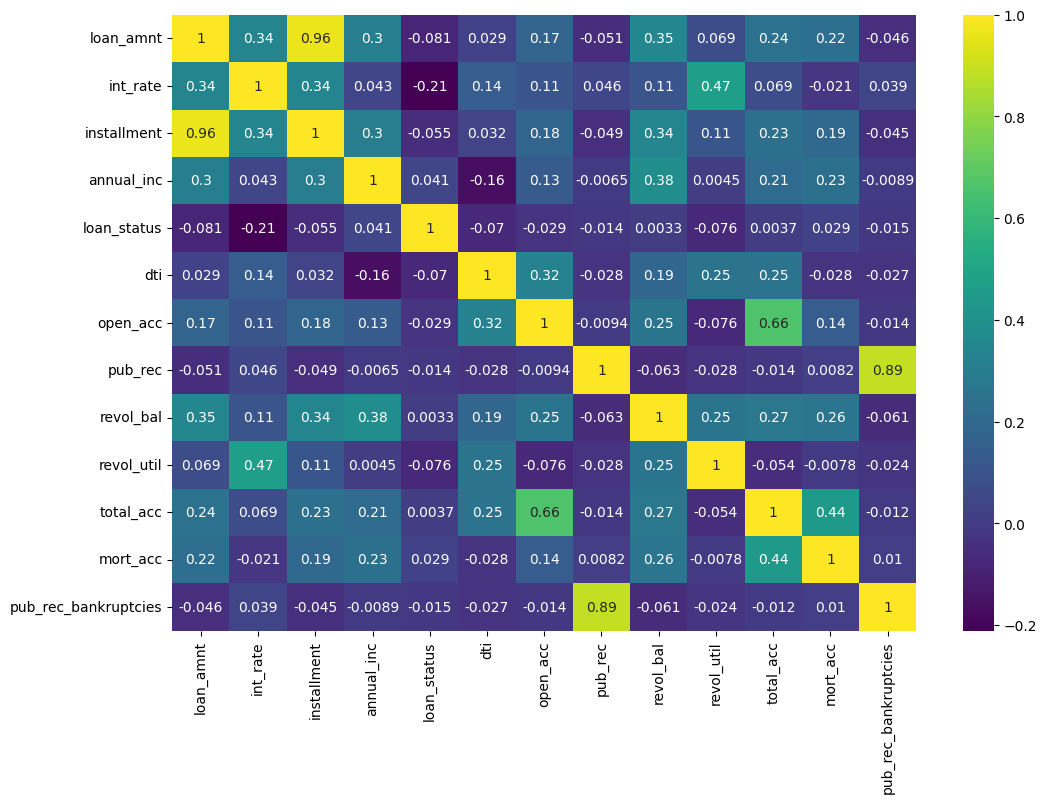

In [138]:
plt.figure(figsize=(12, 8))
sns.heatmap(lc_2012.corr(numeric_only=True), annot=True, cmap='viridis')

In [139]:
lc_2012.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [140]:
# Para dejar solo el valor numerico del plazo de los prestamos
term_values = {' 36 months': 36, ' 60 months': 60}
lc_2012['term'] = lc_2012.term.map(term_values)

C:\Users\joaqu\AppData\Local\Temp\ipykernel_12248\911743284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lc_2012['term'] = lc_2012.term.map(term_values)


In [141]:
lc_2012.head()

loan_amnt  term  int_rate  installment grade sub_grade  \
7     13000.0    36     11.14       426.47     B        B2   
9     26300.0    36     16.29       928.40     C        C5   
14    25975.0    36      6.62       797.53     A        A2   
75    13200.0    36     10.74       430.53     B        B2   
80    19000.0    36     12.12       632.17     B        B3   

                        emp_title emp_length home_ownership  annual_inc  \
7                    Office Depot  10+ years           RENT     46000.0   
9              Regado Biosciences    3 years       MORTGAGE    115000.0   
14      Pullman Regional Hospital    9 years       MORTGAGE     65000.0   
75  Brookdale University Hospital     1 year           RENT     45000.0   
80         Broward Sheriff Office    8 years           RENT     48000.0   

   verification_status    issue_d  loan_status             purpose  \
7         Not Verified 2012-09-01            1         credit_card   
9             Verified 2012-04-01            1  debt_consolidation   
14            Verified 2012-10-01            1      small_business   
75     Source Verified 2012-03-01            1  debt_consolidation   
80     Source Verified 2012-07-01            1  debt_consolidation   

                   title    dti earliest_cr_line  open_acc  pub_rec  \
7   No More Credit Cards  26.87         Sep-1994      11.0      0.0   
9     Debt Consolidation  23.69         Dec-1997      13.0      0.0   
14              Business   9.18         May-2001       9.0      0.0   
75  Honost Consolidation  12.80         May-1994       8.0      0.0   
80             Debt Loan  29.76         Jun-1994      12.0      0.0   

    revol_bal  revol_util  total_acc initial_list_status application_type  \
7     13425.0        64.5       15.0                   f       INDIVIDUAL   
9     22171.0        82.4       37.0                   f       INDIVIDUAL   
14     5140.0         7.2       35.0                   f       INDIVIDUAL   
75    10665.0        75.6       10.0                   f       INDIVIDUAL   
80    30071.0        46.5       28.0                   f       INDIVIDUAL   

    mort_acc  pub_rec_bankruptcies  \
7        0.0                   0.0   
9        1.0                   0.0   
14       6.0                   0.0   
75       0.0                   0.0   
80       0.0                   0.0   

                                              address  
7                         USCGC Nunez\r\nFPO AE 30723  
9              3390 Luis Rue\r\nMauricestad, VA 00813  
14  0472 Weber Manors Apt. 660\r\nLake Andrew, NH ...  
75  1741 Jackson Street Suite 615\r\nNew Jenny, MA...  
80  58673 Foster Freeway\r\nPort Meredithville, NY...

In [142]:
# NAN
for column in lc_2012.columns:
    if lc_2012[column].isna().sum() != 0:
        missing = lc_2012[column].isna().sum()
        portion = (missing / lc_2012.shape[0]) * 100
        print(f"'{column}': NANs '{missing}' ==> '{portion:.3f}%'")

'emp_title': NANs '2477' ==> '6.012%'
'emp_length': NANs '1511' ==> '3.667%'
'title': NANs '1' ==> '0.002%'
'revol_util': NANs '33' ==> '0.080%'
'mort_acc': NANs '5841' ==> '14.176%'


In [143]:
lc_2012.emp_title.nunique()

30984

In [144]:
# Hay muchas profesiones(30984), para crear tantos dummies.
lc_2012 = lc_2012.copy()
lc_2012.drop('emp_title', axis=1, inplace=True)

In [145]:
# mantener esta columna que los valores de la duracion en el trabajo
#  y la media en los nan.....en los demas su valor numerico
lc_2012.emp_length.unique()

array(['10+ years', '3 years', '9 years', '1 year', '8 years', '5 years',
       '6 years', '4 years', '2 years', '7 years', '< 1 year', nan],
      dtype=object)

In [146]:
# Mapa de reemplazo
emp_length_map = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0
}

# Reemplazar los valores en la columna 'emp_length'
lc_2012['emp_length'] = lc_2012['emp_length'].replace(emp_length_map)

# Calcular la media de la columna 'emp_length' (excluyendo NaN)
media_emp_length = lc_2012['emp_length'].mean()

# Reemplazar NaN con la media de la columna
lc_2012['emp_length'] = lc_2012['emp_length'].fillna(media_emp_length)

# Convertir la columna a tipo numérico
lc_2012['emp_length'] = pd.to_numeric(lc_2012['emp_length'], errors='coerce')

# Mostrar el resultado
print(lc_2012['emp_length'])

7         10.0
9          3.0
14         9.0
75         1.0
80         8.0
          ... 
395966     4.0
395984    10.0
395994     4.0
396008    10.0
396028    10.0
Name: emp_length, Length: 41202, dtype: float64


In [147]:
lc_2012.title.value_counts().head()

title
Debt consolidation         3465
Debt Consolidation         3180
Credit card refinancing    1011
debt consolidation          949
Consolidation               887
Name: count, dtype: int64

In [148]:
lc_2012.purpose.value_counts().head()

purpose
debt_consolidation    23611
credit_card            8154
other                  2325
home_improvement       2210
small_business         1070
Name: count, dtype: int64

In [149]:
# Estas columnas nos hablan de lo mismo los objetivos de las financiaciones, por lo que nos deshacemos de title

lc_2012.drop('title', axis=1, inplace=True)

In [150]:
# de momento no voy a crear estos posibles dummies, y voy a drop estas categoricas,
# para un acercamiento inicial a un modelo facil

# dummies = ['verification_status', 'purpose', 'initial_list_status', 
#            'application_type', 'home_ownership']
# lc_2012= pd.get_dummies(lc_2012, columns=dummies, drop_first=True)

# columnas_a_eliminar = ['verification_status', 'purpose', 'initial_list_status', 'application_type', 'home_ownership']

# Utiliza el método drop para eliminar las columnas
lc_2012 = lc_2012.drop(['verification_status', 'purpose', 'initial_list_status', 'application_type', 'home_ownership'], axis=1)

In [151]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41202 entries, 7 to 396028
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             41202 non-null  float64       
 1   term                  41202 non-null  int64         
 2   int_rate              41202 non-null  float64       
 3   installment           41202 non-null  float64       
 4   grade                 41202 non-null  object        
 5   sub_grade             41202 non-null  object        
 6   emp_length            41202 non-null  float64       
 7   annual_inc            41202 non-null  float64       
 8   issue_d               41202 non-null  datetime64[ns]
 9   loan_status           41202 non-null  int64         
 10  dti                   41202 non-null  float64       
 11  earliest_cr_line      41202 non-null  object        
 12  open_acc              41202 non-null  float64       
 13  pub_rec             

In [152]:
lc_2012['sub_grade'].unique()

array(['B2', 'C5', 'A2', 'B3', 'G1', 'C2', 'B1', 'F5', 'A4', 'F1', 'B4',
       'D2', 'A1', 'E4', 'A3', 'C4', 'D3', 'B5', 'D4', 'D1', 'C1', 'E5',
       'C3', 'A5', 'E3', 'D5', 'E2', 'E1', 'F2', 'F3', 'F4', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [153]:
# Infiero la mayor calidad crediticia a cada subgrade
# Mapeo de valores para la columna 'sub_grade'
sub_grade_map = {
    'A1': 35, 'A2': 34, 'A3': 33, 'A4': 32, 'A5': 31,
    'B1': 30, 'B2': 29, 'B3': 28, 'B4': 27, 'B5': 26,
    'C1': 25, 'C2': 24, 'C3': 23, 'C4': 22, 'C5': 21,
    'D1': 20, 'D2': 19, 'D3': 18, 'D4': 17, 'D5': 16,
    'E1': 15, 'E2': 14, 'E3': 13, 'E4': 12, 'E5': 11,
    'F1': 10, 'F2': 9, 'F3': 8, 'F4': 7, 'F5': 6,
    'G1': 5, 'G2': 4, 'G3': 3, 'G4': 2, 'G5': 1
}

# Reemplazar los valores en la columna 'sub_grade'
lc_2012['sub_grade'] = lc_2012['sub_grade'].replace(sub_grade_map)

In [154]:
lc_2012.drop('grade', axis=1, inplace=True)

In [155]:
# Calcular la media de la columna 'mort_acc' (excluyendo NaN)
media_mort_acc = lc_2012['mort_acc'].mean()

# Reemplazar NaN con la media de la columna
lc_2012['mort_acc'] = lc_2012['mort_acc'].fillna(media_mort_acc)

In [156]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41202 entries, 7 to 396028
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             41202 non-null  float64       
 1   term                  41202 non-null  int64         
 2   int_rate              41202 non-null  float64       
 3   installment           41202 non-null  float64       
 4   sub_grade             41202 non-null  int64         
 5   emp_length            41202 non-null  float64       
 6   annual_inc            41202 non-null  float64       
 7   issue_d               41202 non-null  datetime64[ns]
 8   loan_status           41202 non-null  int64         
 9   dti                   41202 non-null  float64       
 10  earliest_cr_line      41202 non-null  object        
 11  open_acc              41202 non-null  float64       
 12  pub_rec               41202 non-null  float64       
 13  revol_bal           

In [157]:
# revol_util  tiene..........41169 non-null  float64, o sea muy pocos null, los elimino
lc_2012 = lc_2012.dropna(subset=['revol_util'])

In [158]:
# No considero address determinante para este estudio, de momento
# La linea mas temprana en el historial crediticio del usuario, tampoco le doy valor,podria comparando con la edad
# issue_d la fecha de emision no es ponderable en si se impaga o no
# por ello dropeo todas esas variables

lc_2012 = lc_2012.drop(['address','earliest_cr_line','issue_d'], axis=1)

In [159]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41169 entries, 7 to 396028
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             41169 non-null  float64
 1   term                  41169 non-null  int64  
 2   int_rate              41169 non-null  float64
 3   installment           41169 non-null  float64
 4   sub_grade             41169 non-null  int64  
 5   emp_length            41169 non-null  float64
 6   annual_inc            41169 non-null  float64
 7   loan_status           41169 non-null  int64  
 8   dti                   41169 non-null  float64
 9   open_acc              41169 non-null  float64
 10  pub_rec               41169 non-null  float64
 11  revol_bal             41169 non-null  float64
 12  revol_util            41169 non-null  float64
 13  total_acc             41169 non-null  float64
 14  mort_acc              41169 non-null  float64
 15  pub_rec_bankruptcies  4

In [160]:
lc_2012.describe()

loan_amnt          term      int_rate   installment     sub_grade  \
count  41169.000000  41169.000000  41169.000000  41169.000000  41169.000000   
mean   13137.568923     39.610289     13.456596    416.905821     25.357866   
std     7947.849979      8.579892      4.303093    246.007263      6.217165   
min     1000.000000     36.000000      6.000000     21.620000      1.000000   
25%     7000.000000     36.000000     10.160000    232.710000     22.000000   
50%    11500.000000     36.000000     13.110000    369.510000     26.000000   
75%    18000.000000     36.000000     16.290000    544.230000     30.000000   
max    35000.000000     60.000000     24.890000   1388.450000     35.000000   

         emp_length    annual_inc   loan_status           dti      open_acc  \
count  41169.000000  4.116900e+04  41169.000000  41169.000000  41169.000000   
mean       5.740388  6.921904e+04      0.835289     16.603209     10.604047   
std        3.478137  6.173912e+04      0.370924      7.589447      4.451843   
min        0.000000  4.800000e+03      0.000000      0.000000      1.000000   
25%        3.000000  4.200000e+04      1.000000     10.930000      7.000000   
50%        5.740067  6.000000e+04      1.000000     16.410000     10.000000   
75%       10.000000  8.350000e+04      1.000000     22.010000     13.000000   
max       10.000000  7.141778e+06      1.000000     34.990000     49.000000   

            pub_rec      revol_bal    revol_util     total_acc      mort_acc  \
count  41169.000000   41169.000000  41169.000000  41169.000000  41169.000000   
mean       0.029488   14876.590226     57.677532     23.496952      1.590278   
std        0.177852   14610.236429     24.265878     10.918701      2.006578   
min        0.000000       0.000000      0.000000      3.000000      0.000000   
25%        0.000000    6612.000000     41.000000     15.000000      0.000000   
50%        0.000000   11683.000000     60.700000     22.000000      1.000000   
75%        0.000000   19262.000000     77.100000     30.000000      2.000000   
max        5.000000  975800.000000    104.400000     99.000000     24.000000   

       pub_rec_bankruptcies  
count          41169.000000  
mean               0.023901  
std                0.156514  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                5.000000

<Axes: >

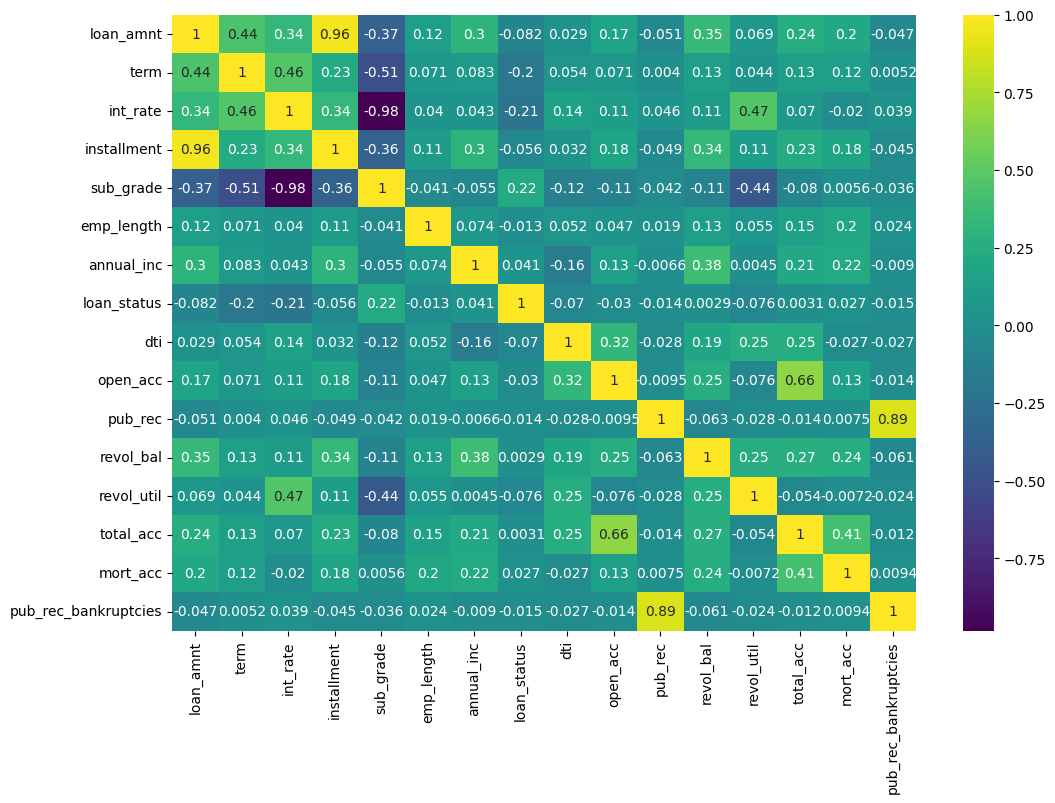

In [161]:
plt.figure(figsize=(12, 8))
sns.heatmap(lc_2012.corr(numeric_only=True), annot=True, cmap='viridis')

In [162]:
'''loan_amnt: Monto del préstamo solicitado.
int_rate: Tasa de interés del préstamo.
installment: Pago mensual del préstamo.
sub_grade: Subgrado asignado al préstamo por LendingClub (A1, A2, B1, etc.).
open_acc: Número de líneas de crédito abiertas en el archivo del prestatario.
pub_rec: Número de registros públicos desfavorables.
total_acc: Número total de cuentas de crédito del prestatario.
pub_rec_bankruptcies: Número de quiebras en los registros públicos.'''

# El interes y la subcategorizacion estan relacionados en un -98%, a mayor categoria menor tipo, quito subcategoria
# El capital solicitado tiene un 96 % de corr con la cuota, normal la cuota es segun el capital, quito capital
# Las cuenta abiertas y totales estan relacionadas en un 66%, normal las abiertas estan en las totales, quito las abiertas
# Las quiebras y los resgistros desfavorables se relacionan en un89%, normal las quiebras son desfavorables, quito las quiebras

lc_2012 = lc_2012.drop(['sub_grade','loan_amnt','open_acc','pub_rec_bankruptcies'], axis=1)

In [163]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41169 entries, 7 to 396028
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   term         41169 non-null  int64  
 1   int_rate     41169 non-null  float64
 2   installment  41169 non-null  float64
 3   emp_length   41169 non-null  float64
 4   annual_inc   41169 non-null  float64
 5   loan_status  41169 non-null  int64  
 6   dti          41169 non-null  float64
 7   pub_rec      41169 non-null  float64
 8   revol_bal    41169 non-null  float64
 9   revol_util   41169 non-null  float64
 10  total_acc    41169 non-null  float64
 11  mort_acc     41169 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 4.1 MB


In [164]:
lc_2012.head()

term  int_rate  installment  emp_length  annual_inc  loan_status    dti  \
7     36     11.14       426.47        10.0     46000.0            1  26.87   
9     36     16.29       928.40         3.0    115000.0            1  23.69   
14    36      6.62       797.53         9.0     65000.0            1   9.18   
75    36     10.74       430.53         1.0     45000.0            1  12.80   
80    36     12.12       632.17         8.0     48000.0            1  29.76   

    pub_rec  revol_bal  revol_util  total_acc  mort_acc  
7       0.0    13425.0        64.5       15.0       0.0  
9       0.0    22171.0        82.4       37.0       1.0  
14      0.0     5140.0         7.2       35.0       6.0  
75      0.0    10665.0        75.6       10.0       0.0  
80      0.0    30071.0        46.5       28.0       0.0

In [165]:
lc_2012.describe()

term      int_rate   installment    emp_length    annual_inc  \
count  41169.000000  41169.000000  41169.000000  41169.000000  4.116900e+04   
mean      39.610289     13.456596    416.905821      5.740388  6.921904e+04   
std        8.579892      4.303093    246.007263      3.478137  6.173912e+04   
min       36.000000      6.000000     21.620000      0.000000  4.800000e+03   
25%       36.000000     10.160000    232.710000      3.000000  4.200000e+04   
50%       36.000000     13.110000    369.510000      5.740067  6.000000e+04   
75%       36.000000     16.290000    544.230000     10.000000  8.350000e+04   
max       60.000000     24.890000   1388.450000     10.000000  7.141778e+06   

        loan_status           dti       pub_rec      revol_bal    revol_util  \
count  41169.000000  41169.000000  41169.000000   41169.000000  41169.000000   
mean       0.835289     16.603209      0.029488   14876.590226     57.677532   
std        0.370924      7.589447      0.177852   14610.236429     24.265878   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        1.000000     10.930000      0.000000    6612.000000     41.000000   
50%        1.000000     16.410000      0.000000   11683.000000     60.700000   
75%        1.000000     22.010000      0.000000   19262.000000     77.100000   
max        1.000000     34.990000      5.000000  975800.000000    104.400000   

          total_acc      mort_acc  
count  41169.000000  41169.000000  
mean      23.496952      1.590278  
std       10.918701      2.006578  
min        3.000000      0.000000  
25%       15.000000      0.000000  
50%       22.000000      1.000000  
75%       30.000000      2.000000  
max       99.000000     24.000000

<Axes: >

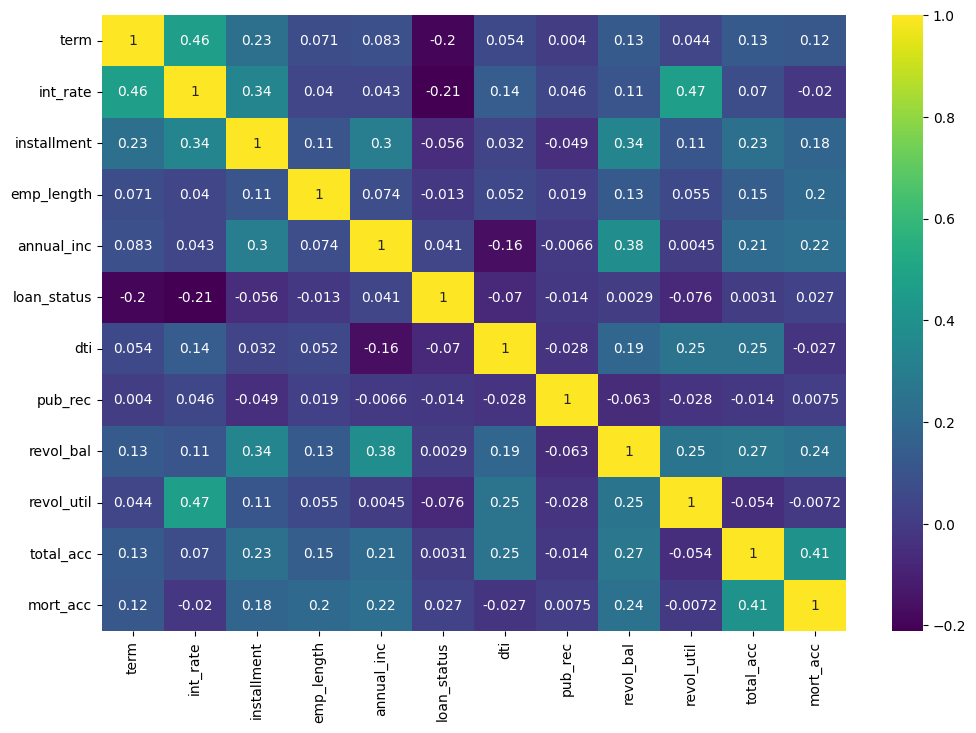

In [166]:
plt.figure(figsize=(12, 8))
sns.heatmap(lc_2012.corr(numeric_only=True), annot=True, cmap='viridis')

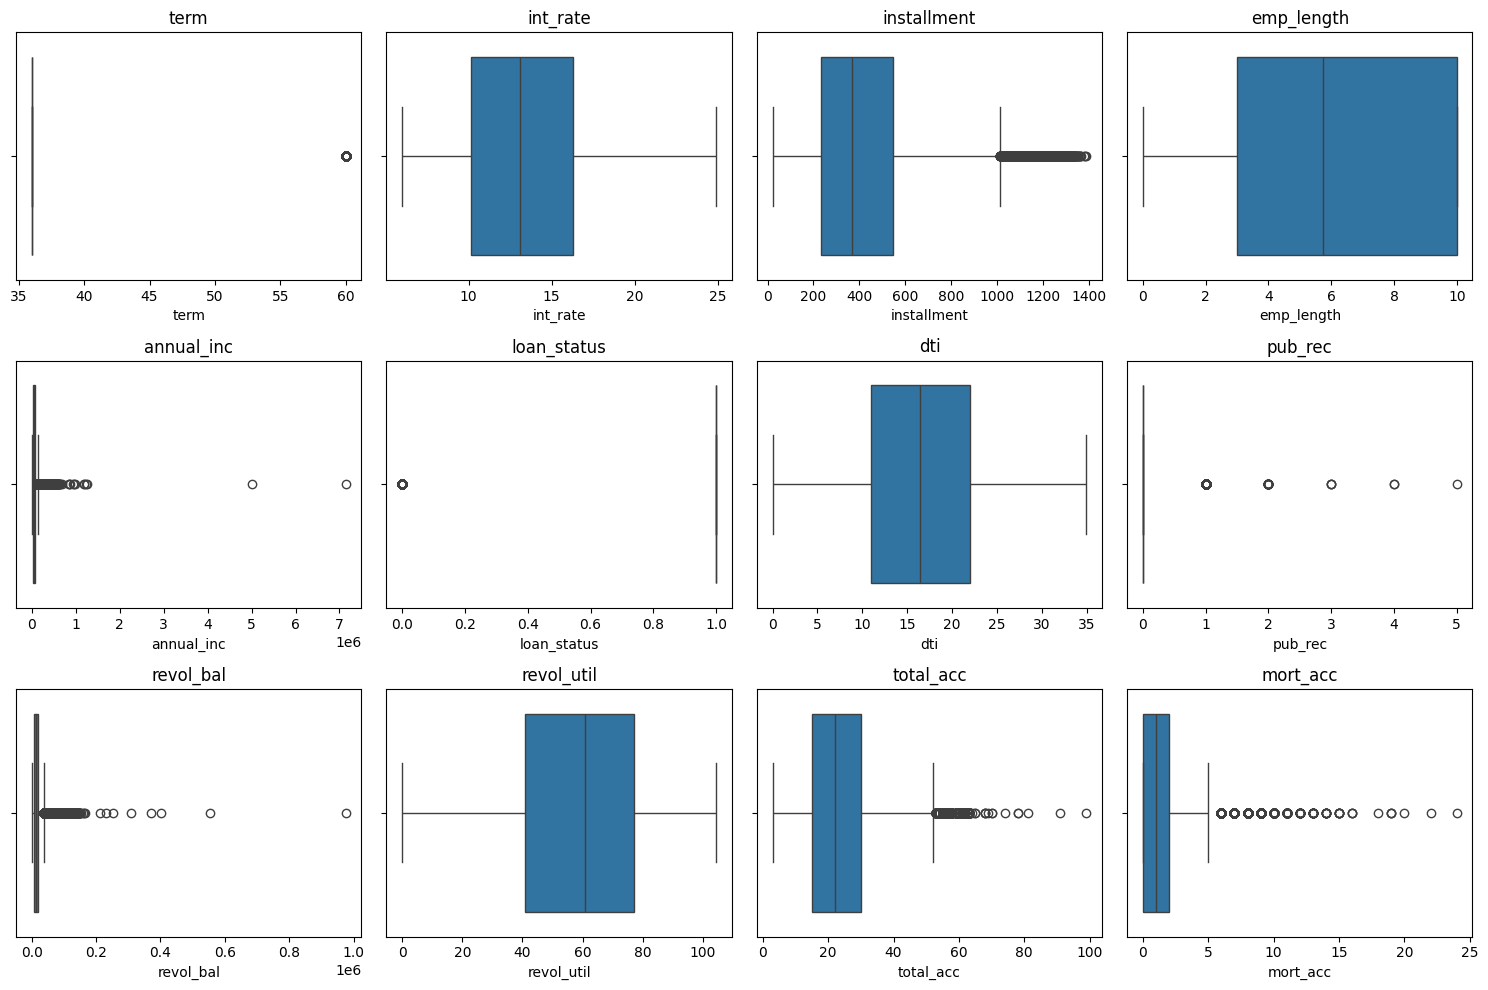

In [167]:

features = ['term', 'int_rate', 'installment', 'emp_length', 'annual_inc',
            'loan_status', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
            'total_acc', 'mort_acc']

# Configuración del tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # 3 filas, 4 columnas
    sns.boxplot(x=lc_2012[feature])
    plt.title(feature)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [168]:
# OJO PARA BALANCEAR LA MUESTRA

from sklearn.utils import resample


lc_2012_majority = lc_2012[lc_2012['loan_status'] == 1]
lc_2012_minority = lc_2012[lc_2012['loan_status'] == 0]

lc_2012_majority_downsampled = resample(lc_2012_majority, replace=False, n_samples=len(lc_2012_minority), random_state=42)

lc_2012_balanced = pd.concat([lc_2012_majority_downsampled, lc_2012_minority])

In [169]:
lc_2012_balanced['loan_status'].value_counts(normalize=True)

loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64

In [183]:
lc_2012_balanced['loan_status'].value_counts()

loan_status
1    6781
0    6781
Name: count, dtype: int64

In [170]:
lc_2012_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13562 entries, 331927 to 395941
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   term         13562 non-null  int64  
 1   int_rate     13562 non-null  float64
 2   installment  13562 non-null  float64
 3   emp_length   13562 non-null  float64
 4   annual_inc   13562 non-null  float64
 5   loan_status  13562 non-null  int64  
 6   dti          13562 non-null  float64
 7   pub_rec      13562 non-null  float64
 8   revol_bal    13562 non-null  float64
 9   revol_util   13562 non-null  float64
 10  total_acc    13562 non-null  float64
 11  mort_acc     13562 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 1.3 MB


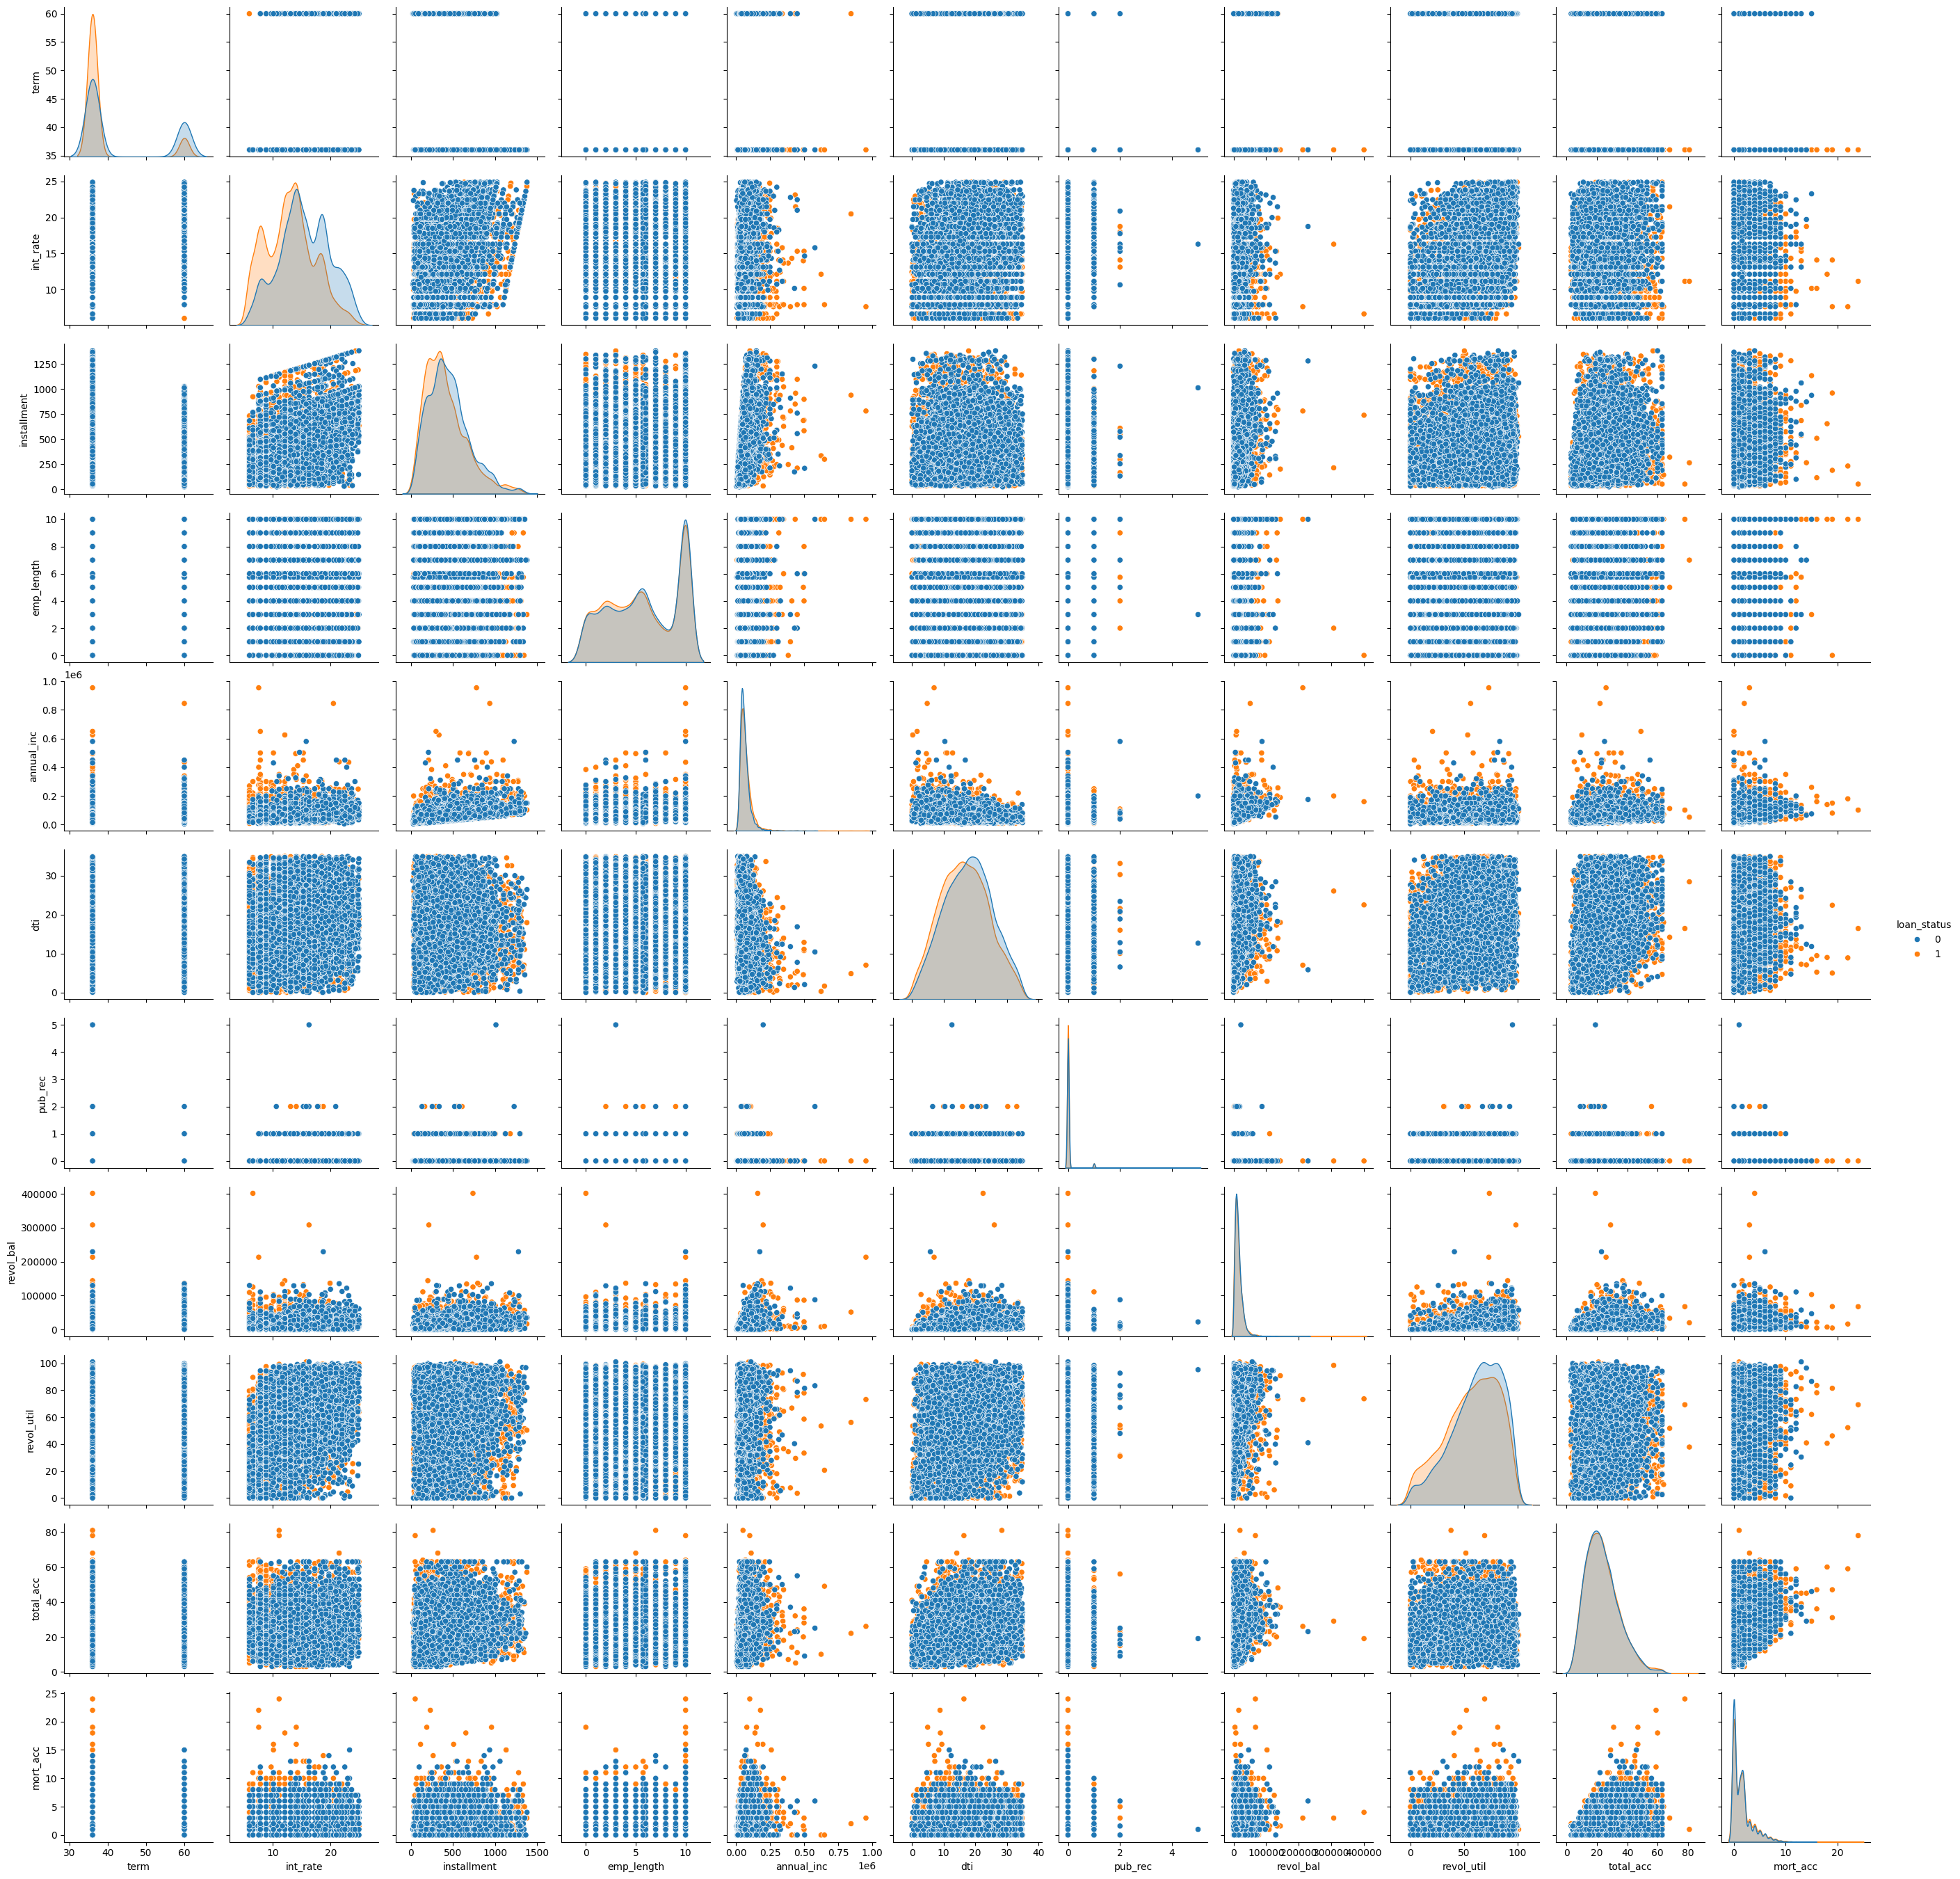

In [171]:
sns.pairplot(lc_2012_balanced, hue="loan_status")

<Axes: >

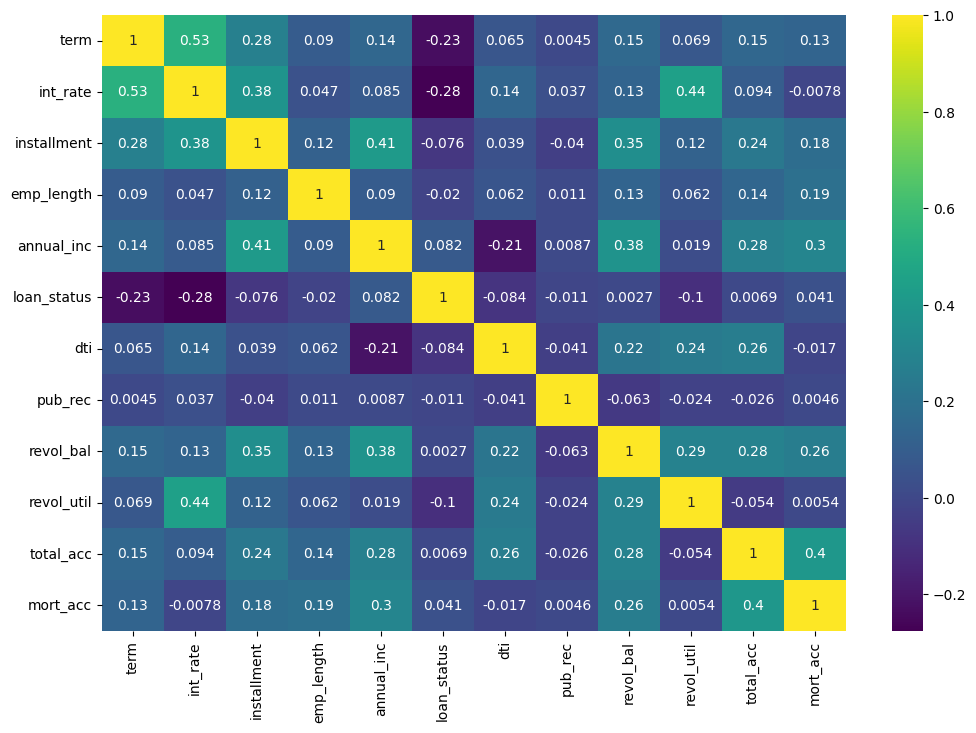

In [172]:
plt.figure(figsize=(12, 8))
sns.heatmap(lc_2012_balanced.corr(numeric_only=True), annot=True, cmap='viridis')

In [173]:
# lc_2012_balanced.to_csv('lc_2012_balanced.csv', index=False)

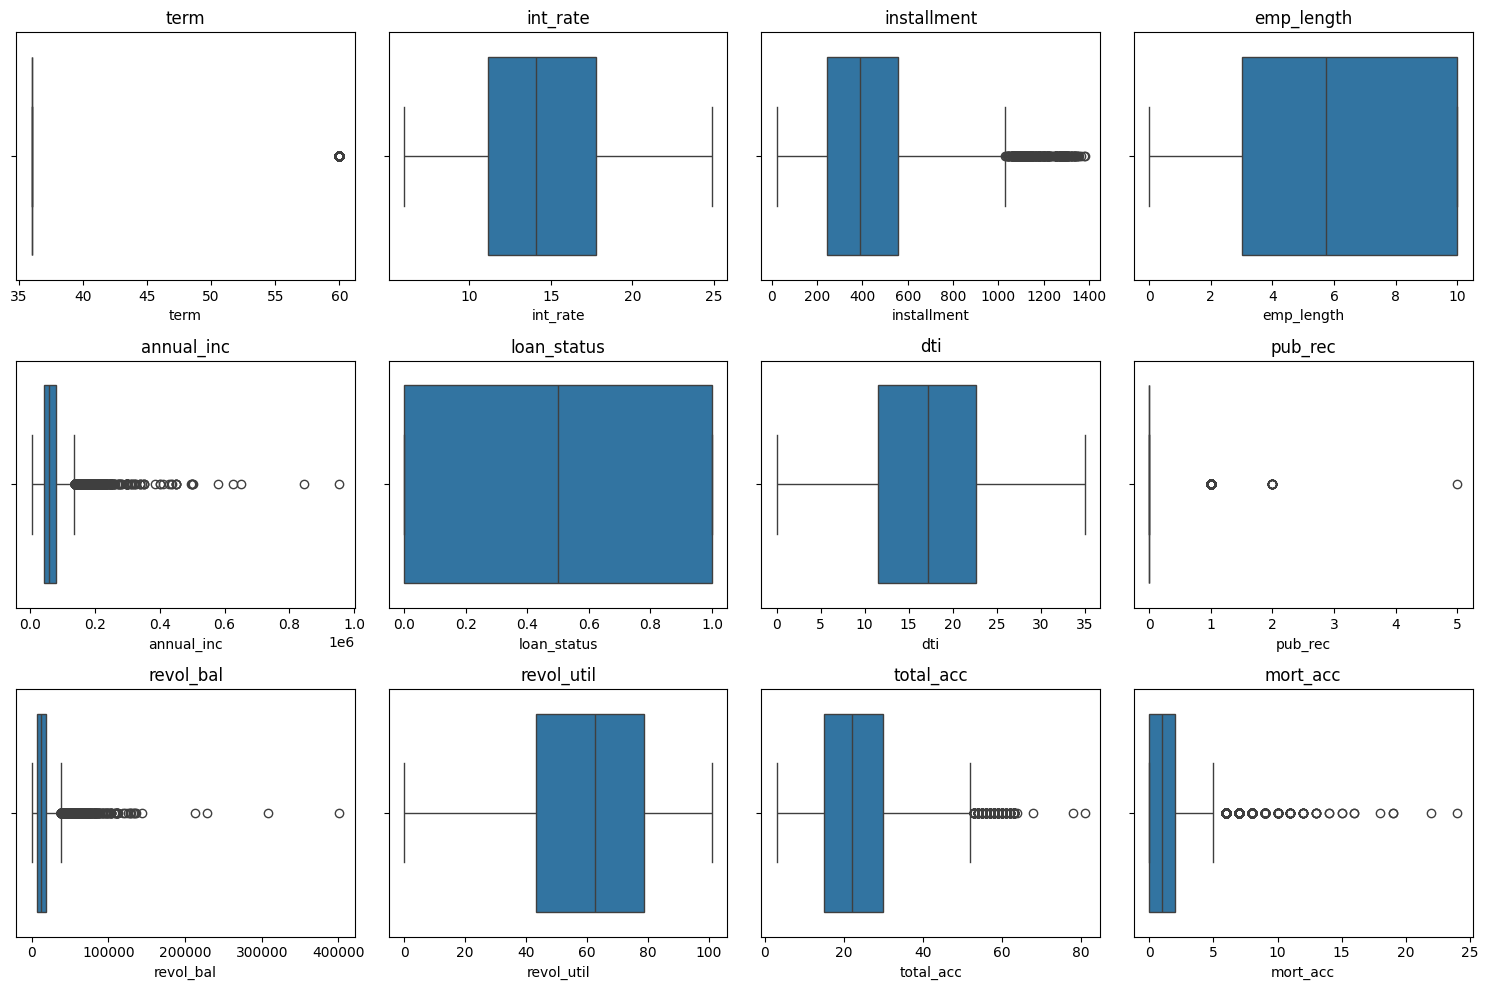

In [174]:

features = ['term', 'int_rate', 'installment', 'emp_length', 'annual_inc',
            'loan_status', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
            'total_acc', 'mort_acc']

# Configuración del tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # 3 filas, 4 columnas
    sns.boxplot(x=lc_2012_balanced[feature])
    plt.title(feature)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [175]:
# # Calcular los límites del bigote en el boxplot
# Q1 = lc_2012['revol_util'].quantile(0.25)
# Q3 = lc_2012['revol_util'].quantile(0.75)
# IQR = Q3 - Q1

# # Definir los límites de los outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identificar los outliers
# outliers = lc_2012[(lc_2012['revol_util'] < lower_bound) | (lc_2012['revol_util'] > upper_bound)]

# # Mostrar los outliers
# print("Outliers en 'revol_util':")
# print(outliers['revol_util'])

In [176]:


# OJO TRANSFORMACION LOGARITMICA???????



# # Lista de features
# features = ['term', 'int_rate', 'installment', 'emp_length', 'annual_inc',
#             'loan_status', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
#             'total_acc', 'mort_acc']

# # Aplicar la transformación logarítmica a los features
# lc_2012_log = lc_2012_balanced[features].apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# # Configuración del tamaño de la figura
# plt.figure(figsize=(15, 10))

# # Crear boxplots para cada feature después de la transformación logarítmica
# for i, feature in enumerate(features, 1):
#     plt.subplot(3, 4, i)  # 3 filas, 4 columnas
#     sns.boxplot(x=lc_2012_log[feature])
#     plt.title(f'{feature} (Logarithmic Transformation)')

# # Ajustar el diseño
# plt.tight_layout()

# # Mostrar los boxplots
# plt.show()

loan_amnt: Monto del préstamo solicitado.
term: Plazo del préstamo en meses.
int_rate: Tasa de interés del préstamo.
installment: Pago mensual del préstamo.
grade: Grado asignado al préstamo por LendingClub (A, B, C, etc.).
sub_grade: Subgrado asignado al préstamo por LendingClub (A1, A2, B1, etc.).
emp_title: Título laboral del prestatario.
emp_length: Antigüedad laboral del prestatario en años.
home_ownership: Estado de propiedad de la vivienda del prestatario (RENT, OWN, MORTGAGE, OTHER).
annual_inc: Ingreso anual del prestatario.
verification_status: Estado de verificación del ingreso del prestatario.
issue_d: Fecha en la que se emitió el préstamo.
loan_status: Estado actual del préstamo (Fully Paid, Charged Off, etc.).
purpose: Propósito del préstamo.
title: Título del préstamo proporcionado por el prestatario.
dti: Relación entre las deudas y el ingreso del prestatario.
earliest_cr_line: Fecha en que se abrió la primera línea de crédito del prestatario.
open_acc: Número de líneas de crédito abiertas en el archivo del prestatario.
pub_rec: Número de registros públicos desfavorables.
revol_bal: Saldo total de las cuentas de crédito renovable.
revol_util: Tasa de utilización de las cuentas de crédito renovable.
total_acc: Número total de cuentas de crédito del prestatario.
initial_list_status: Estado inicial de la lista del préstamo (W, F).
application_type: Tipo de aplicación (INDIVIDUAL, JOINT).
mort_acc: Número de cuentas hipotecarias.
pub_rec_bankruptcies: Número de quiebras en los registros públicos.
address: Dirección del prestatario.

In [177]:
lc_2012_balanced = lc_2012_balanced.copy()


In [178]:
X = lc_2012_balanced.drop(['loan_status'], axis=1)

In [179]:
X

term  int_rate  installment  emp_length  annual_inc    dti  pub_rec  \
331927    36     13.11       337.47    9.000000     78000.0  26.15      0.0   
245230    36     13.11       101.25   10.000000     95000.0  28.07      0.0   
354034    36     13.11       337.47    2.000000     50000.0  24.31      0.0   
309471    36     12.12       399.26    1.000000     66500.0  10.72      0.0   
62727     36     12.12       440.85   10.000000     55000.0   7.48      0.0   
...      ...       ...          ...         ...         ...    ...      ...   
395788    36     13.11       506.21    6.000000    200000.0   8.36      0.0   
395801    60     21.00       689.19    6.000000     82000.0  12.70      0.0   
395874    36     11.71       119.08    5.000000     72000.0   9.08      0.0   
395912    36      7.90       250.33    2.000000     67000.0  29.77      0.0   
395941    36      6.62       221.07    5.740067     14772.0  16.57      0.0   

        revol_bal  revol_util  total_acc  mort_acc  
331927     7532.0        77.6       23.0  0.000000  
245230    58095.0        82.4       50.0  4.000000  
354034    44558.0        83.0       22.0  0.000000  
309471    36033.0        67.7       21.0  2.000000  
62727      9487.0        66.8       18.0  0.000000  
...           ...         ...        ...       ...  
395788     2827.0        11.7       29.0  2.000000  
395801    15658.0        72.3       35.0  0.000000  
395874     6043.0        85.8       25.0  1.590594  
395912     9120.0        49.6       54.0  1.000000  
395941     2100.0        13.0        6.0  0.000000  

[13562 rows x 11 columns]

In [180]:
y = lc_2012_balanced.drop(['term','int_rate','installment','emp_length','annual_inc','dti','pub_rec','revol_bal','revol_util','total_acc','mort_acc'], axis=1)

In [181]:
y

loan_status
331927            1
245230            1
354034            1
309471            1
62727             1
...             ...
395788            0
395801            0
395874            0
395912            0
395941            0

[13562 rows x 1 columns]

In [182]:

# X.to_csv('X.csv', index=False)
# y.to_csv('y.csv', index=False)